In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Preparation for prediction model

First, we will load the data and set the data type for every column.

In [26]:
df=pd.read_csv("dataset_finalv2_Glee.csv")
#Converting columns into correct datatype
df['Url']=pd.Series(df['Url'], dtype="string")
df['Address']=pd.Series(df['Address'], dtype="string")
df['Status']=pd.Series(df['Status'], dtype="category")
df['Bed']=pd.Series(df['Bed'], dtype="int64")
df['Bath']=pd.Series(df['Bath'], dtype="float64")
df['Year built']=pd.Series(df['Year built'], dtype="int64")
df['Parking type']=pd.Series(df['Parking type'], dtype="category")
df['Parking space']=pd.Series(df['Parking space'], dtype="int64")
df['HOA']=pd.Series(df['HOA'], dtype="int64")
df['City']=pd.Series(df['City'], dtype="category")
df['Days on zillow']=pd.Series(df['Days on zillow'], dtype="int64")
df['Sold date']=pd.Series(df['Sold date'], dtype="datetime64")
df['Heating_bool']=pd.Series(df['Heating_bool'], dtype="bool")
df['Cooling_bool']=pd.Series(df['Cooling_bool'], dtype="bool")
df.dtypes

Url                         object
Address                     object
Status                    category
Bed                          int64
Bath                       float64
Price                        int64
Year built                   int64
Days on zillow               int64
Lot size(sqft)               int64
House size(sqft)             int64
Parking type              category
Parking space                int64
Price/sqft                 float64
Sold date           datetime64[ns]
HOA                          int64
City                      category
Heating_bool                  bool
Cooling_bool                  bool
dtype: object

We are trying use sold house data to predict the sold price for properties. Therefore, we will filter the Status 'Sold'. Also, we will drop irrelevant or uninformative columns. I also drop the Price per sqft because this column was calculated with sold price, which is the information we are trying to predict.

In [6]:
df_sold=df[df['Status']=='Sold']
df_sold=df_sold.drop(columns=['Status','Url','Address','Days on zillow','Sold date','Price/sqft'])
df_sold.reset_index(drop=True, inplace=True)
df_sold.head()

,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking type,Parking space,HOA,City,Heating_bool,Cooling_bool
0,3,2.5,866000,1959,5259,1838,Space,2,0,SanJose,True,True
1,4,2.0,1050000,1976,6865,1794,Space,1,0,SanJose,True,True
2,3,2.0,991000,1968,6046,1723,Space,2,0,SanJose,True,True
3,3,2.0,1380000,1959,5259,1262,Space,3,0,SanJose,True,True
4,3,2.0,1110000,1966,6899,1596,Space,2,0,SanJose,True,True


Since Parking type and City are categorical data, we used get_dummies method from pandas library to transform the columns into boolean columns. The original columns are dropped automatically.

In [7]:
#build dummy column for the model
df_sold_dum=pd.get_dummies(df_sold, columns=['Parking type','City'])
df_sold_dum.head()

,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking space,HOA,Heating_bool,Cooling_bool,Parking type_Carport,Parking type_Garage,Parking type_No Parking,Parking type_Off street,Parking type_Space,City_Richmond,City_SanJose,City_SanLeandro,City_SanMateo
0,3,2.5,866000,1959,5259,1838,2,0,True,True,0,0,0,0,1,0,1,0,0
1,4,2.0,1050000,1976,6865,1794,1,0,True,True,0,0,0,0,1,0,1,0,0
2,3,2.0,991000,1968,6046,1723,2,0,True,True,0,0,0,0,1,0,1,0,0
3,3,2.0,1380000,1959,5259,1262,3,0,True,True,0,0,0,0,1,0,1,0,0
4,3,2.0,1110000,1966,6899,1596,2,0,True,True,0,0,0,0,1,0,1,0,0


We will then look into the basic statistics information, and remove outlier data using emperical rule.

In [8]:
df_sold_dum.describe()

,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking space,HOA,Parking type_Carport,Parking type_Garage,Parking type_No Parking,Parking type_Off street,Parking type_Space,City_Richmond,City_SanJose,City_SanLeandro,City_SanMateo
count,754.000000,754.00000,7.540000e+02,754.000000,7.540000e+02,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,3.098143,1.98309,8.088797e+05,1954.019894,7.286812e+03,1545.385942,1.537135,13.595491,0.009284,0.115385,0.001326,0.009284,0.864721,0.433687,0.054377,0.431034,0.080902
std,0.867548,0.86897,4.491282e+05,22.135965,4.048597e+04,609.248758,0.760461,84.643017,0.095968,0.319698,0.036418,0.095968,0.342248,0.495912,0.226910,0.495550,0.272865
min,1.000000,1.00000,4.000000e+03,1902.000000,3.920000e+02,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.00000,5.700000e+05,1942.000000,4.564500e+03,1107.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.00000,7.150000e+05,1951.000000,5.205000e+03,1412.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.50000,8.800000e+05,1962.000000,6.140000e+03,1798.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,8.000000,6.00000,3.900000e+06,2015.000000,1.114700e+06,4726.000000,10.000000,1175.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
def removeOutliers(data, outlierConstant):
    for col in data.columns:
        print(col)
        if col in ['Heating_bool','Cooling_bool','Parking type_Carport','Parking type_Garage','Parking type_No Parking','Parking type_Off street','Parking type_Space','City_Richmond','City_SanJose','City_SanLeandro','City_SanMateo']:
            continue
        else:
            a = data[col].values.reshape(len(data),1)
            mean = np.mean(a)
            std = np.std(a)
            cut_off = std * 3
    
            lower_limit  = mean - cut_off 
            upper_limit = mean + cut_off
            count=0
            for y in a:
                if y < lower_limit or y >upper_limit:
                    try:
                        data=data.drop(count, axis=0)
                        print(f"row %d dropped" % count)
                    except:
                        print("row dropped already")
                count+=1
        data.reset_index(drop=True, inplace=True)
    return data
df_sold_drop=removeOutliers(df_sold_dum, 1.5)

Bed
row 6 dropped
row 16 dropped
row 276 dropped
row 285 dropped
row 594 dropped
row 635 dropped
row 638 dropped
row 645 dropped
row 712 dropped
Bath
row 16 dropped
row 486 dropped
row 682 dropped
row 705 dropped
row 715 dropped
Price
row 21 dropped
row 32 dropped
row 240 dropped
row 685 dropped
row 686 dropped
row 687 dropped
row 689 dropped
row 691 dropped
row 694 dropped
row 699 dropped
row 711 dropped
row 714 dropped
row 721 dropped
row 722 dropped
row 723 dropped
row 724 dropped
row 725 dropped
row 728 dropped
row 730 dropped
row 734 dropped
Year built
Lot size(sqft)
row 717 dropped
House size(sqft)
row 67 dropped
row 148 dropped
row 199 dropped
row 374 dropped
row 381 dropped
row 678 dropped
Parking space
row 9 dropped
row 72 dropped
row 102 dropped
row 156 dropped
row 412 dropped
row 437 dropped
row 515 dropped
row 592 dropped
row 624 dropped
row 637 dropped
row 650 dropped
row 667 dropped
row 692 dropped
HOA
row 509 dropped
row 669 dropped
row 675 dropped
row 694 dropped
row 69

In [10]:
#Moving the price column to the last
df_sold_drop['Price_n']=df_sold_drop['Price']
df_sold_drop=df_sold_drop.drop(columns=['Price'])

Since Heating and Cooling are boolean value 'True' and 'False', we also need to transform them into numerical value 1 and 0.

In [11]:
df_sold_drop['Heating_bool']=pd.Series(df_sold_drop['Heating_bool'], dtype="int64")
df_sold_drop['Cooling_bool']=pd.Series(df_sold_drop['Cooling_bool'], dtype="int64")
df_sold_drop.head()

,Bed,Bath,Year built,Lot size(sqft),House size(sqft),Parking space,HOA,Heating_bool,Cooling_bool,Parking type_Carport,Parking type_Garage,Parking type_No Parking,Parking type_Off street,Parking type_Space,City_Richmond,City_SanJose,City_SanLeandro,City_SanMateo,Price_n
0,3,2.5,1959,5259,1838,2,0,1,1,0,0,0,0,1,0,1,0,0,866000
1,4,2.0,1976,6865,1794,1,0,1,1,0,0,0,0,1,0,1,0,0,1050000
2,3,2.0,1968,6046,1723,2,0,1,1,0,0,0,0,1,0,1,0,0,991000
3,3,2.0,1959,5259,1262,3,0,1,1,0,0,0,0,1,0,1,0,0,1380000
4,3,2.0,1966,6899,1596,2,0,1,1,0,0,0,0,1,0,1,0,0,1110000


In [12]:
df_sold_drop.describe()

,Bed,Bath,Year built,Lot size(sqft),House size(sqft),Parking space,HOA,Heating_bool,Cooling_bool,Parking type_Carport,Parking type_Garage,Parking type_No Parking,Parking type_Off street,Parking type_Space,City_Richmond,City_SanJose,City_SanLeandro,City_SanMateo,Price_n
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,6.950000e+02
mean,3.030216,1.891007,1953.985612,5656.638849,1470.473381,1.483453,6.473381,0.997122,0.332374,0.010072,0.109353,0.001439,0.010072,0.869065,0.457554,0.050360,0.441727,0.050360,7.392392e+05
std,0.759536,0.771947,22.013353,2625.370981,506.375223,0.587526,27.756383,0.053606,0.471404,0.099924,0.312306,0.037932,0.099924,0.337572,0.498554,0.218844,0.496950,0.218844,2.935630e+05
min,1.000000,1.000000,1902.000000,392.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03
25%,3.000000,1.000000,1942.000000,4499.000000,1096.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.636940e+05
50%,3.000000,2.000000,1951.000000,5166.000000,1378.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+05
75%,3.000000,2.000000,1961.000000,6096.000000,1711.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,8.450000e+05
max,5.000000,4.000000,2015.000000,38333.000000,3137.000000,3.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.980000e+06


Before training model, we also need to normalize the data so that the features are under the same scale and prevent some of the features with larger scale dominate other features. We used Min-Max normalization here and turned the independent variables into 0 to 1 scale.

In [13]:
def min_max_norm(x,col):
    norm=(x-col.min())/(col.max()-col.min())
    return norm
df_norm=pd.DataFrame()
for i in df_sold_drop.columns:
    col=df_sold_drop[i]
    df_norm[i]=col.apply(min_max_norm, args=(col,))
df_norm.head()  

,Bed,Bath,Year built,Lot size(sqft),House size(sqft),Parking space,HOA,Heating_bool,Cooling_bool,Parking type_Carport,Parking type_Garage,Parking type_No Parking,Parking type_Off street,Parking type_Space,City_Richmond,City_SanJose,City_SanLeandro,City_SanMateo,Price_n
0,0.50,0.500000,0.504425,0.128278,0.511103,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.436235
1,0.75,0.333333,0.654867,0.170607,0.494543,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.529352
2,0.50,0.333333,0.584071,0.149021,0.467821,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.499494
3,0.50,0.333333,0.504425,0.128278,0.294317,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.696356
4,0.50,0.333333,0.566372,0.171503,0.420023,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.559717


In [14]:
df_norm.shape

(695, 19)

## Method 1: Least Square Method

We used curve_fit method from scipy library to perform the linear regression. We will use all 18 columns and convert the data in numpy matrix as features. 

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
def fitFunc(x_3d, a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s):
    return a + b*x_3d[:,0]+ c*x_3d[:,1]+ d*x_3d[:,2]+ e*x_3d[:,3]+ f*x_3d[:,4]+ g*x_3d[:,5]+ h*x_3d[:,6]+ i*x_3d[:,7]+ j*x_3d[:,8]+ k*x_3d[:,9]+ l*x_3d[:,10]+ m*x_3d[:,11]+ n*x_3d[:,12]+ o*x_3d[:,13]+ p*x_3d[:,14]+ q*x_3d[:,15]+ r*x_3d[:,16]+ s*x_3d[:,17]
X = df_norm.iloc[:, 0:18].values.reshape(695,18)
Y = np.ndarray.flatten(df_sold_drop.iloc[:, -1].values.reshape(695, 1)) #dependent doesn't need to be normalized
popt, pcov = curve_fit(fitFunc, X, Y)
popt

array([ 187955.26008246, -133763.28962772,  204519.22815299,
       -185525.60690535,  235565.93298919,  441808.87159996,
         83116.70070962,   72554.51261311,   63767.56996127,
         19930.32915015, -232050.14704991, -191462.59365507,
       -140875.2613894 , -226529.54065974, -147256.26147962,
        368380.39411459,  897603.24474805,  476119.70145432,
       1239200.86951753])

As we can see from the result above, the regression model can be written as 
y=187955.26-133763.29(bed)+204519.23(bath)-185525.61(Year built)+235565.93(lot size)+441808.87(House size)+83116.70(# of Parking Space)+72554.51(HOA)+63767.57(Heating)+19930.33(Cooling)-232050.15(Parking type_Carport)-191462.59(Parking type_Garage)-140875.26(Parking type_No Parking)-226529.54(Parking type_Off street)-147256.26(Parking type_Space)+368380.39(Richmond)+897603.24(San Jose)+476119.70(San leandro)+1239200.87(San Mateo)

We try to use OLS from statsmodels library to find out the adj. R-squared and p-value for each independent variable. We were able to achieve 0.69 adj. R-squared, which means this model is able to explain 69% of the variation of the price. Also, HOA, Heating, Cooling and Richmond variable have a p-value higher than 0.05, suggesting that they might not be good predictor for sold price.

In [ ]:
import statsmodels.regression.linear_model as sm 
regressor_OLS = sm.OLS(endog = Y, exog = X).fit() 
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     99.01
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          3.71e-165
Time:                        02:42:17   Log-Likelihood:                -9316.9
No. Observations:                 695   AIC:                         1.867e+04
Df Residuals:                     678   BIC:                         1.875e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.338e+05   4.48e+04     -2.987      0.003   -2.22e+05   -4.58e+04
x2          2.045e+05   3.98e+04      5.134      0.000    1.26e+05    2.83e+05
x3         -1.855e+05   3.98e+04     -4.656      0.000   -2.64e+05   -1.07e+05
x4          2.356e+05   9.83e+04      2.396      0.017    4.25e+04    4.29e+05
x5          4.418e+05   5.69e+04      7.762      0.000     3.3e+05    5.54e+05
x6          8.312e+04   3.94e+04      2.112      0.035    5849.423     1.6e+05
x7          7.255e+04   5.08e+04      1.427      0.154   -2.73e+04    1.72e+05
x8          6.377e+04   1.16e+05      0.548      0.584   -1.65e+05    2.92e+05
x9          1.993e+04   1.41e+04      1.410      0.159   -7826.156    4.77e+04
x10          2.87e+05   7.92e+04      3.622      0.000    1.31e+05    4.43e+05
x11         3.276e+05   5.96e+04      5.496      0.000    2.11e+05    4.45e+05
x12         3.782e+05   1.55e+05      2.441      0.015     7.4e+04    6.82e+05
x13         2.925e+05   7.85e+04      3.728      0.000    1.38e+05    4.47e+05
x14         3.718e+05   5.85e+04      6.360      0.000    2.57e+05    4.87e+05
x15          3.73e+04   6.97e+04      0.535      0.593   -9.96e+04    1.74e+05
x16         5.665e+05   7.46e+04      7.592      0.000     4.2e+05    7.13e+05
x17          1.45e+05    6.9e+04      2.102      0.036    9576.671    2.81e+05
x18         9.081e+05   7.29e+04     12.462      0.000    7.65e+05    1.05e+06
==============================================================================
Omnibus:                       67.337   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.569
Skew:                          -0.352   Prob(JB):                     4.80e-59
Kurtosis:                       5.963   Cond. No.                     4.76e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The root mean sqaure error and mean absolute error seems high below. We will plot the residual plot to check if it's randomly dispersed.

In [ ]:
from math import sqrt
stdevs = np.sqrt(np.diag(pcov))
res = Y - fitFunc(X, *popt)
rmse=sqrt(np.sum(res**2)/(len(df_norm)-1))
mae=np.sum(np.absolute(res))/len(res)
print(f'rmse: %2f, mae: %2f' %(rmse,mae))

rmse: 160714.767736, mae: 113919.732053


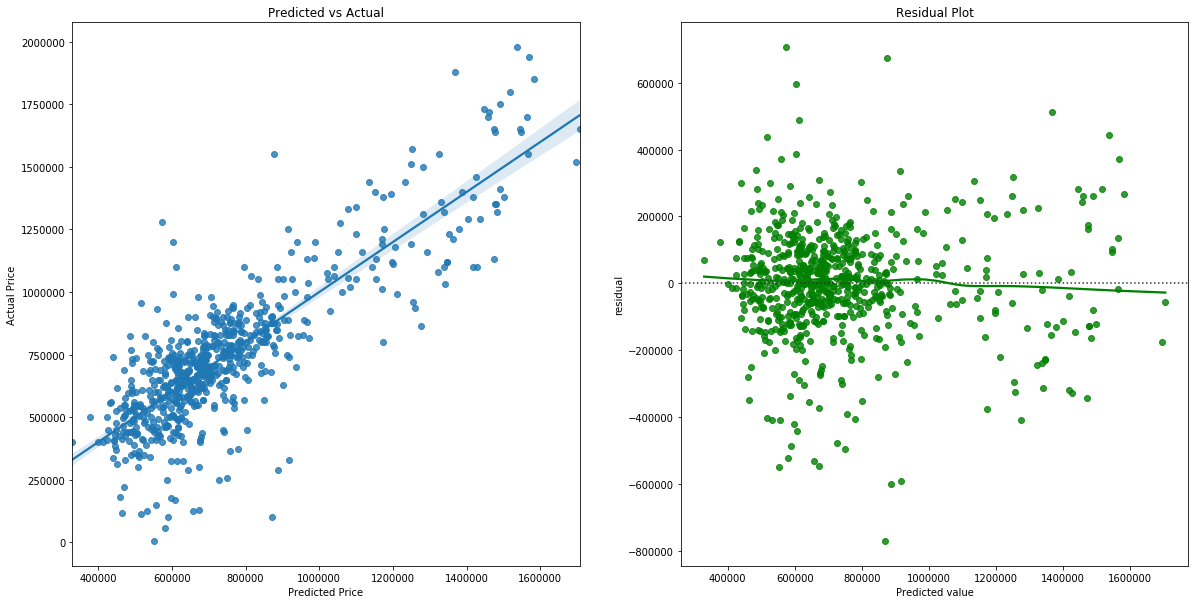

In [ ]:
fig,ax = plt.subplots(1,2)
sns.regplot(fitFunc(X, *popt),Y,ax=ax[0])
ax[0].set_xlabel("Predicted Price")
ax[0].set_ylabel("Actual Price")
ax[0].set_title("Predicted vs Actual")
#ax[0].set_xticks(rotation=45)
sns.residplot(fitFunc(X, *popt), y=res, lowess=True, color="g",ax=ax[1])
ax[1].set_xlabel("Predicted value")
ax[1].set_ylabel("residual")
ax[1].set_title("Residual Plot")
#ax[1].set_xticklabels([0.4,0.6,0.8,1,1.2,1.4,1.6,1.8])
fig.subplots_adjust(wspace=0.2)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

We can see that most actual prices are below 1 million dollars, and we could also see from the residual plot that it is not randomly dispersed, and has a little non-linear bum in the middle of the graph.

## Lasso Regression

We want to minimize the error, and we also notice that some features might not be helpful to the prediction. Therefore, we explored the lasso regression alhorithm, which has L1 penalty for feature selection. We first used GridSearchCV method to identify the best value for alpha(the penalty parameter).

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-232734.31520358514


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6799080409094.6455, tolerance: 4415454709.043394
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7237429766224.245, tolerance: 5166060902.818213
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5292884141694.058, tolerance: 4834945811.947486
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Since the Search did not converge, we simply set alpha=1. 

In [ ]:
model=Lasso(alpha=1)
model.fit(X,Y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
predict=model.predict(X)
print(f'r^2: %2f' % r2_score(Y, predict))
print(f'rmse: %2f' % sqrt(mean_squared_error(Y, predict)))

r^2: 0.700285
rmse: 160599.109769


As we can see, neither the r-squared nor rmse has improved.

In [ ]:
print(model.coef_)
print(model.intercept_)

[-133763.39828231  204519.24023799 -185525.59983559  235565.953555
  441808.90693271   83116.73233709   72554.50357083   63767.48881765
   19930.31803399  -83554.71719957  -42967.13771578    7620.23096568
  -78034.10191588    1239.17637038 -264247.90278151  264974.94204493
 -156508.63052115  606572.54083325]
672088.252578458


If we compare the coefficient to the last method, we can see that most of them are the same except for all parking type and city columns. It is possible that the changes are due to the L1 penalty. 

## Method 3: XGBoost
Since Lasso regression is not able to reduce the error, we further explore a gradient boosting method called XGBoost. It is an ensemble tree method that will keep developing new tree to minimize the error from last tree until stablized.

In [ ]:
#tree method doesn't need data to be normalized
df_sold_drop.head()

,Bed,Bath,Year built,Lot size(sqft),House size(sqft),Parking space,HOA,Heating_bool,Cooling_bool,Parking type_Carport,Parking type_Garage,Parking type_No Parking,Parking type_Off street,Parking type_Space,City_Richmond,City_SanJose,City_SanLeandro,City_SanMateo,Price_n
0,3,2.5,1959,5259,1838,2,0,1,1,0,0,0,0,1,0,1,0,0,866000
1,4,2.0,1976,6865,1794,1,0,1,1,0,0,0,0,1,0,1,0,0,1050000
2,3,2.0,1968,6046,1723,2,0,1,1,0,0,0,0,1,0,1,0,0,991000
3,3,2.0,1959,5259,1262,3,0,1,1,0,0,0,0,1,0,1,0,0,1380000
4,3,2.0,1966,6899,1596,2,0,1,1,0,0,0,0,1,0,1,0,0,1110000


In [ ]:
import xgboost as xgb
model_pre=df_sold_drop.sample(frac=1)
split=int(0.8*len(model_pre))
train = model_pre.iloc[:split]
test = model_pre.iloc[split:]
target = train['Price_n']
train=train.drop(columns=['Price_n'])

In [ ]:
#check for target distribution
target.describe()

count    5.560000e+02
mean     7.463010e+05
std      3.003170e+05
min      4.000000e+03
25%      5.650000e+05
50%      7.050000e+05
75%      8.450000e+05
max      1.980000e+06
Name: Price_n, dtype: float64

In [ ]:
test['Price_n'].describe()

count    1.390000e+02
mean     7.109922e+05
std      2.639466e+05
min      1.775000e+05
25%      5.365000e+05
50%      6.800000e+05
75%      8.415000e+05
max      1.730000e+06
Name: Price_n, dtype: float64

In [ ]:
t_target=test['Price_n']
test=test.drop(columns=['Price_n'])

We need to convert data into matrix to pass on for training.

In [ ]:
xgtrain = xgb.DMatrix(train.values, target.values,feature_names=train.columns)
xgtest = xgb.DMatrix(test.values,t_target.values,feature_names=test.columns)

We will set a prelimimary parameter to check our baseline rmse first. Then we will use grid search to find better combination for the hyperparameter.

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=xgtrain, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics=["rmse"], as_pandas=True, seed=123)
cv_results['test-rmse-mean'].min()

178574.109375

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,10)
    for min_child_weight in range(2,9)
]
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    #Run CV
    cv_results = xgb.cv(
        params,
        xgtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        metrics=['rmse'],
        early_stopping_rounds=10
    )
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=1, min_child_weight=2
	RMSE 175447.38541666666 for 180 rounds
CV with max_depth=1, min_child_weight=3
	RMSE 175512.72395833334 for 180 rounds
CV with max_depth=1, min_child_weight=4
	RMSE 175512.72395833334 for 180 rounds
CV with max_depth=1, min_child_weight=5
	RMSE 175157.43229166666 for 199 rounds
CV with max_depth=1, min_child_weight=6
	RMSE 175097.18229166666 for 196 rounds
CV with max_depth=1, min_child_weight=7
	RMSE 175888.6875 for 171 rounds
CV with max_depth=1, min_child_weight=8
	RMSE 176030.59895833334 for 169 rounds
CV with max_depth=2, min_child_weight=2
	RMSE 174050.125 for 86 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 172814.16145833334 for 141 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 174097.93229166666 for 103 rounds
CV with max_depth=2, min_child_weight=5
	RMSE 172606.48958333334 for 115 rounds
CV with max_depth=2, min_child_weight=6
	RMSE 174017.09895833334 for 109 rounds
CV with max_depth=2, min_child_weight=7
	RMSE 174925.598

In [ ]:
params['max_depth'] = 2
params['min_child_weight'] = 5

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(2,8)]
    for colsample in [i/10. for i in range(2,8)]
]
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        xgtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        metrics=['rmse'],
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, rmse: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.7, colsample=0.7
	RMSE 173608.078125 for 68 rounds
CV with subsample=0.7, colsample=0.6
	RMSE 173826.44791666666 for 61 rounds
CV with subsample=0.7, colsample=0.5
	RMSE 174191.828125 for 61 rounds
CV with subsample=0.7, colsample=0.4
	RMSE 172295.80729166666 for 96 rounds
CV with subsample=0.7, colsample=0.3
	RMSE 173098.08333333334 for 107 rounds
CV with subsample=0.7, colsample=0.2
	RMSE 177278.90104166666 for 134 rounds
CV with subsample=0.6, colsample=0.7
	RMSE 172570.51041666666 for 81 rounds
CV with subsample=0.6, colsample=0.6
	RMSE 173165.640625 for 59 rounds
CV with subsample=0.6, colsample=0.5
	RMSE 173576.859375 for 81 rounds
CV with subsample=0.6, colsample=0.4
	RMSE 172728.14583333334 for 114 rounds
CV with subsample=0.6, colsample=0.3
	RMSE 171799.46354166666 for 112 rounds
CV with subsample=0.6, colsample=0.2
	RMSE 176644.78125 for 134 rounds
CV with subsample=0.5, colsample=0.7
	RMSE 172895.703125 for 75 rounds
CV with subsample=0.5, colsample=0.6
	

In [ ]:
params['subsample'] = 0.4
params['colsample_bytree'] = 0.4

In [ ]:
%time
min_rmse = float("Inf")
best_params = None
for learning_rate in [.3, .2, .1, .05, .01, .005]:
    print("CV with learning rate={}".format(learning_rate))
    # We update our parameters
    params['learning_rate'] = learning_rate
    # Run and time CV
    %time cv_results = xgb.cv(params, xgtrain,num_boost_round=200,seed=42,nfold=3,metrics=['rmse'],early_stopping_rounds=10)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = learning_rate
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
CV with learning rate=0.3
CPU times: user 432 ms, sys: 30.5 ms, total: 462 ms
Wall time: 97 ms
	RMSE 175776.79166666666 for 21 rounds

CV with learning rate=0.2
CPU times: user 314 ms, sys: 4.05 ms, total: 318 ms
Wall time: 41.2 ms
	RMSE 175979.70833333334 for 41 rounds

CV with learning rate=0.1
CPU times: user 637 ms, sys: 7.71 ms, total: 645 ms
Wall time: 83.5 ms
	RMSE 171337.86458333334 for 109 rounds

CV with learning rate=0.05
CPU times: user 1.14 s, sys: 19 ms, total: 1.16 s
Wall time: 156 ms
	RMSE 173091.77604166666 for 191 rounds

CV with learning rate=0.01
CPU times: user 1.09 s, sys: 14.2 ms, total: 1.1 s
Wall time: 145 ms
	RMSE 233580.38020833334 for 199 rounds

CV with learning rate=0.005
CPU times: user 1.05 s, sys: 10.9 ms, total: 1.06 s
Wall time: 137 ms
	RMSE 369870.59375 for 199 rounds

Best params: 0.1, RMSE: 171337.86458333334


In [ ]:
params['learning_rate']=0.1

In [ ]:
min_rmse = float("Inf")
best_params = None
for alpha in range(2,11):
    print("CV with alpha={}".format(alpha))
    # We update our parameters
    params['alpha'] = alpha
    # Run and time CV
    %time cv_results = xgb.cv(params, xgtrain,num_boost_round=200,seed=42,nfold=3,metrics=['rmse'],early_stopping_rounds=10)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = alpha
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with alpha=2
CPU times: user 930 ms, sys: 39.2 ms, total: 970 ms
Wall time: 164 ms
	RMSE 171337.84375 for 109 rounds

CV with alpha=3
CPU times: user 768 ms, sys: 16.5 ms, total: 784 ms
Wall time: 107 ms
	RMSE 171337.83854166666 for 109 rounds

CV with alpha=4
CPU times: user 608 ms, sys: 4.25 ms, total: 612 ms
Wall time: 78.4 ms
	RMSE 171337.84375 for 109 rounds

CV with alpha=5
CPU times: user 598 ms, sys: 2.98 ms, total: 601 ms
Wall time: 75.8 ms
	RMSE 171337.84375 for 109 rounds

CV with alpha=6
CPU times: user 631 ms, sys: 5.87 ms, total: 637 ms
Wall time: 82.2 ms
	RMSE 171337.84375 for 109 rounds

CV with alpha=7
CPU times: user 810 ms, sys: 23.5 ms, total: 834 ms
Wall time: 117 ms
	RMSE 171337.86979166666 for 109 rounds

CV with alpha=8
CPU times: user 904 ms, sys: 27.8 ms, total: 932 ms
Wall time: 133 ms
	RMSE 171337.84895833334 for 109 rounds

CV with alpha=9
CPU times: user 624 ms, sys: 5.24 ms, total: 629 ms
Wall time: 80.3 ms
	RMSE 171337.86979166666 for 109 rounds

CV w

In [ ]:
params['alpha']=3
params

{'objective': 'reg:squarederror',
 'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'alpha': 3,
 'min_child_weight': 5,
 'subsample': 0.4}

After updating the hyperparameter, we will start to train the model. We are able to lower the rmse to 149038.94 in this model.

In [ ]:
xg_reg = xgb.train(params=params, dtrain=xgtrain, num_boost_round=200,early_stopping_rounds=10, evals=[(xgtest, "Test")])

[0]	Test-rmse:687555.50000
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:622284.12500
[2]	Test-rmse:564150.68750
[3]	Test-rmse:512128.40625
[4]	Test-rmse:466793.50000
[5]	Test-rmse:426461.65625
[6]	Test-rmse:391888.81250
[7]	Test-rmse:359639.09375
[8]	Test-rmse:332955.12500
[9]	Test-rmse:309126.50000
[10]	Test-rmse:287295.21875
[11]	Test-rmse:267500.37500
[12]	Test-rmse:251544.01562
[13]	Test-rmse:238665.87500
[14]	Test-rmse:226802.00000
[15]	Test-rmse:215052.85938
[16]	Test-rmse:207115.32812
[17]	Test-rmse:198594.26562
[18]	Test-rmse:193633.60938
[19]	Test-rmse:189208.71875
[20]	Test-rmse:182463.28125
[21]	Test-rmse:178559.70312
[22]	Test-rmse:174697.00000
[23]	Test-rmse:170435.29688
[24]	Test-rmse:167580.39062
[25]	Test-rmse:164782.78125
[26]	Test-rmse:162235.50000
[27]	Test-rmse:161210.93750
[28]	Test-rmse:159811.53125
[29]	Test-rmse:159474.45312
[30]	Test-rmse:158541.64062
[31]	Test-rmse:157750.76562
[32]	Test-rmse:157506.07812
[33]	Test-rmse:156221.84375
[

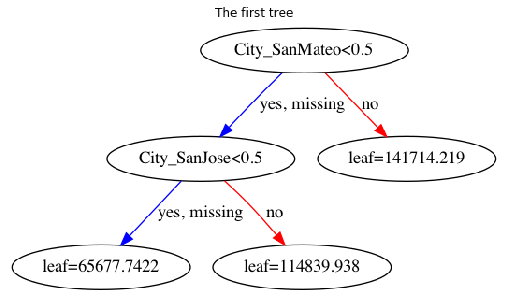

In [ ]:
# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.title('The first tree')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

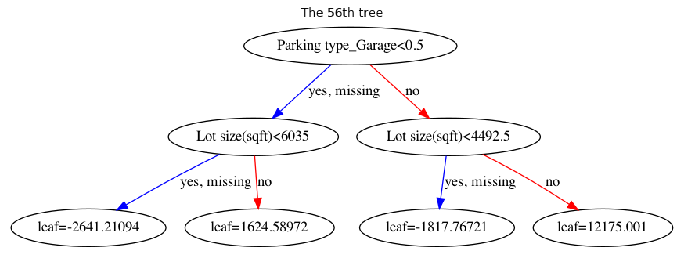

In [ ]:
# Plot the best tree in terms of minimizing rmse
xgb.plot_tree(xg_reg,num_trees=56)
plt.title('The 56th tree')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

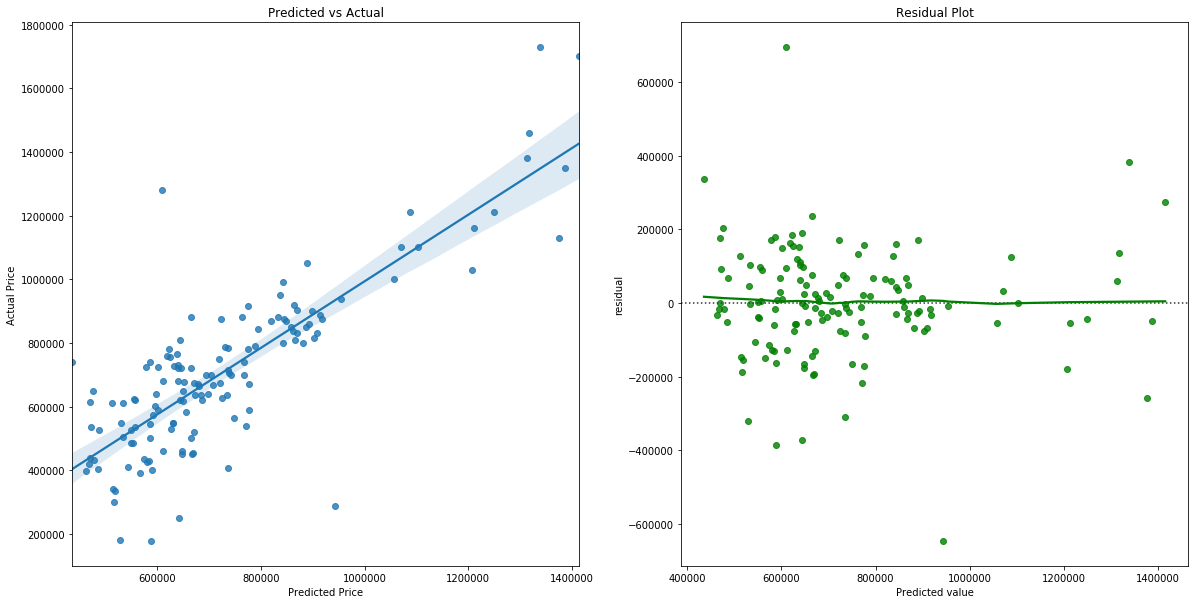

In [ ]:
#apply test data to predict
import seaborn as sns
test_mat=np.ndarray.flatten(t_target.values.reshape(139,1))
y_pred=xg_reg.predict(xgtest)
fig,ax = plt.subplots(1,2)
sns.regplot(y_pred,test_mat,ax=ax[0])
ax[0].set_xlabel("Predicted Price")
ax[0].set_ylabel("Actual Price")
ax[0].set_title("Predicted vs Actual")
sns.residplot(y_pred,y=test_mat-y_pred,lowess=True, color="g",ax=ax[1])
ax[1].set_xlabel("Predicted value")
ax[1].set_ylabel("residual")
ax[1].set_title("Residual Plot")
fig.subplots_adjust(wspace=0.2)
plt.show()

XGboost default library has a feature importance plot, but it is not able to show whether it positively or negatively impact the sold price.

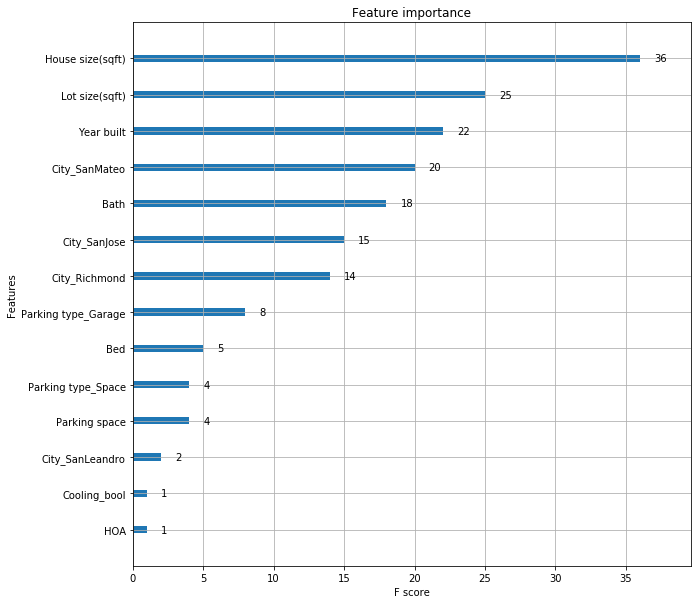

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

Therefore, we explore shap (SHapley Additive exPlanations) library, which is a relatively new method to interpret the contribution of each feature to the prediction with SHAP value. Therefore, we might see a different ranking with the feature importance below.

In [ ]:
import shap
explainerXGB = shap.TreeExplainer(xg_reg)
shap_values_XGB_test = explainerXGB.shap_values(test)
shap_values_XGB_train = explainerXGB.shap_values(train)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=test.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=train.columns.values)

We could explore how each feature contribute to the predict result for each property.

In [ ]:
a=int(input("Please enter the property row number you want to explore:"))
shap.initjs()
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[a], test.iloc[[a]]) 

Please enter the property row number you want to explore:0


Here is the bar chart to rank feature according to SHAP value. As we can see, the SanMateo and Richmond rank first and second, which means they has a relatively higher contribution to the sold price prediction than the others. This result is different from the original feature importance. 

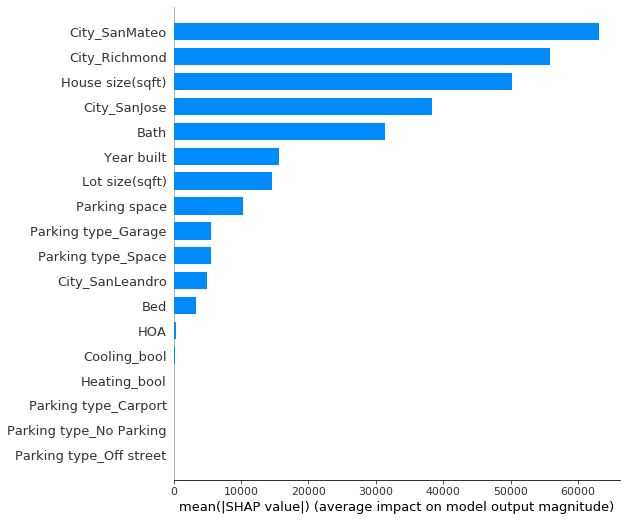

In [ ]:
shap.summary_plot(shap_values_XGB_train, train, plot_type="bar")

We could also look into the positive and negative contribution for each features.

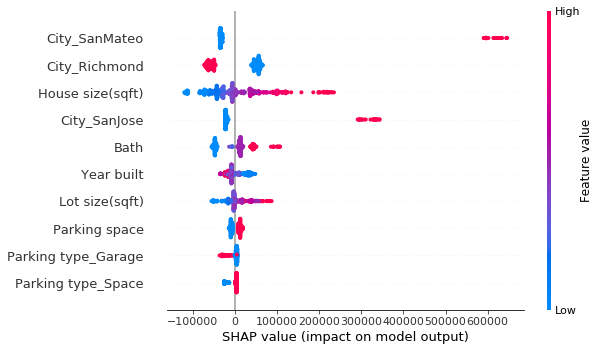

In [ ]:
shap.summary_plot(shap_values_XGB_train, train,max_display=10)

## Ben Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from urllib.request import urlopen
import seaborn as sns


## Read data and seperate Sales and Sold data frames

df = pd.read_csv('dataset_finalv2.csv', sep=',')
#data.head(3)
sales = df[(df['Status']=='Sale')]
sales.drop(['Url', 'Days on zillow'], axis = 1)
sold = (df[(df['Status']=='Sold')]).drop(columns = ['Url', 'Days on zillow', 'Heating_bool', 'Cooling_bool'])
sold['MonthName'] = pd.to_datetime(df['Sold date']).dt.strftime('%B')
sold['Month'] = pd.to_datetime(df['Sold date']).dt.strftime('%m')

rate =[]
for i in sold['MonthName']:
    if i == 'January':
        rate.append(3.62)
    elif i== 'February':
        rate.append(3.47)
    elif i == 'March':
        rate.append(3.45)
    elif i == 'April':
        rate.append(3.31)
    elif i == 'May':
        rate.append(3.23)
    elif i == 'June':
        rate.append(3.16)
    elif i == 'July':
        rate.append(3.02)
    elif i == 'August':
        rate.append(2.94)
    else:
        rate.append(2.897)
sold['IntRate'] = rate 

# show Sold dataframe with interest rate
sold



,Address,Status,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking type,Parking space,Price/sqft,Sold date,HOA,City,MonthName,Month,IntRate
409,"5242 Vera Ln, San Jose, CA 95111",Sold,3,2.5,866000,1959,5259,1838,Space,2,471.16,2020-09-04,0,SanJose,September,09,2.897
410,"6106 Heathercreek Way, San Jose, CA 95123",Sold,4,2.0,1050000,1976,6865,1794,Space,1,585.28,2020-09-14,0,SanJose,September,09,2.897
411,"6049 Sanford Dr, San Jose, CA 95123",Sold,3,2.0,991000,1968,6046,1723,Space,2,575.16,2020-10-14,0,SanJose,October,10,2.897
412,"1134 Kelez Dr, San Jose, CA 95120",Sold,3,2.0,1380000,1959,5259,1262,Space,3,1093.50,2020-06-30,0,SanJose,June,06,3.160
413,"4126 Cherry Ave, San Jose, CA 95118",Sold,3,2.0,1110000,1966,6899,1596,Space,2,695.49,2020-07-02,0,SanJose,July,07,3.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,"438 Highland Ave, San Mateo, CA 94401",Sold,3,1.0,1290000,1912,4560,1220,Space,1,1057.38,2020-08-14,0,SanMateo,August,08,2.940
1164,"1816 Dale Ave, San Mateo, CA 94401",Sold,3,2.0,1130000,1955,5662,1250,Space,2,904.00,2020-08-14,0,SanMateo,August,08,2.940
1165,"958 Peninsula Ave, San Mateo, CA 94401",Sold,2,2.0,950000,1965,1114700,1152,Space,1,824.65,2020-09-23,665,SanMateo,September,09,2.897
1166,"444 Fathom Dr, San Mateo, CA 94404",Sold,4,3.0,1520000,1968,2600,2250,Space,2,675.56,2020-09-22,170,SanMateo,September,09,2.897


In [ ]:
## Look at the Top 10 expensive houses

## San Jose
City_Sj= (sold[sold['City']=='SanJose']).drop(['Status','City'], axis=1)

Sj_top10 = City_Sj.sort_values(by=['Price'], ascending=False).head(10)
Sj_top10

#sales = df[(df['Status']=='Sale')]
#sjsold= sold.groupby()

,Address,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking type,Parking space,Price/sqft,Sold date,HOA,MonthName,Month,IntRate
427,"5665 Algonquin Way, San Jose, CA 95138",5,5.0,2730000,1997,11326,4726,Space,3,577.66,2020-09-09,148,September,09,2.897
444,"6867 Dartmoor Way, San Jose, CA 95129",4,4.0,2630000,1959,6124,2131,Space,2,1234.16,2020-09-10,0,September,09,2.897
433,"6481 Camelia Dr, San Jose, CA 95120",4,3.0,2200000,1965,13939,2890,Space,2,761.25,2020-09-11,0,September,09,2.897
429,"4703 W Hacienda Ave, Campbell, CA 95008",4,3.0,1880000,1963,7239,2353,Space,2,798.98,2020-09-11,0,September,09,2.897
431,"654 Brentwood Dr, San Jose, CA 95129",4,3.0,1570000,1955,7426,1571,Space,2,999.36,2020-09-11,0,September,09,2.897
440,"1731 Glen Una Ave, San Jose, CA 95125",4,3.0,1550000,1928,4443,2146,Space,1,722.27,2020-09-10,0,September,09,2.897
420,"1964 Harmil Way, San Jose, CA 95125",3,2.0,1510000,1948,5767,1750,Space,2,862.86,2020-09-10,0,September,09,2.897
448,"4918 Howes Ln, San Jose, CA 95118",4,3.0,1500000,1965,7522,2133,Space,1,703.23,2020-09-10,0,September,09,2.897
415,"270 Los Palmos Way, San Jose, CA 95119",6,4.0,1500000,1970,5998,3323,Space,3,451.40,2020-09-11,33,September,09,2.897
449,"1039 Bright Oak Pl, San Jose, CA 95120",5,3.0,1460000,1969,14375,2585,Space,2,564.80,2020-07-07,54,July,07,3.020


In [ ]:
## San Mateo's Top 10 most expensive houses
City_Sm= sold[sold['City']=='SanMateo'].drop(['Status','City'], axis=1)
Sm_top10 = City_Sm.sort_values(by=['Price'], ascending=False).head(10)
Sm_top10


,Address,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking type,Parking space,Price/sqft,Sold date,HOA,MonthName,Month,IntRate
1128,"91 Crystal Springs Rd, Hillsborough, CA 94010",4,5.0,3900000,1906,16988,3990,Space,1,977.44,2020-09-15,0,September,09,2.897
1112,"1320 Yew St, San Mateo, CA 94402",5,4.0,3390000,1947,16117,3806,Space,1,890.70,2020-09-23,0,September,09,2.897
1156,"472 Parrott Dr, San Mateo, CA 94402",4,3.0,3250000,1960,9121,3150,Garage,1,1031.75,2020-08-21,0,August,08,2.940
1158,"743 Nevada Ave, San Mateo, CA 94402",5,3.0,3000000,1941,6599,2670,Garage,1,1123.60,2020-08-20,0,August,08,2.940
1139,"344 Seville Way, San Mateo, CA 94402",3,3.0,2950000,1937,5501,2500,Space,1,1180.00,2020-08-31,0,August,08,2.940
1116,"715 Columbia Dr, San Mateo, CA 94402",5,4.0,2800000,1946,7318,2580,Space,2,1085.27,2020-09-21,0,September,09,2.897
1124,"509 Edinburgh St, San Mateo, CA 94402",4,3.0,2800000,1927,7200,2950,Space,1,949.15,2020-09-16,0,September,09,2.897
1119,"132 Aragon Blvd, San Mateo, CA 94402",3,3.0,2730000,1936,6050,2055,Garage,1,1328.47,2020-09-18,0,September,09,2.897
1110,"820 Crescent Ave, San Mateo, CA 94401",4,3.0,2650000,1926,5170,2250,Space,1,1177.78,2020-09-24,0,September,09,2.897
1138,"1244 Homewood Ave, San Mateo, CA 94403",4,5.0,2550000,1973,11761,2508,Space,1,1016.75,2020-09-01,0,September,09,2.897


In [ ]:
## San Leandro's top 10 most expensive houses 
City_Sl= sold[sold['City']=='SanLeandro'].drop(['Status','City'], axis=1)
Sl_top10 = City_Sl.sort_values(by=['Price'], ascending=False).head(10)
Sl_top10

,Address,Bed,Bath,Price,Year built,Lot size(sqft),House size(sqft),Parking type,Parking space,Price/sqft,Sold date,HOA,MonthName,Month,IntRate
1106,"2657 Vista Grand Ct, San Leandro, CA 94577",4,4.0,1405000,1961,30056,3834,Space,1,366.46,2020-01-30,0,January,01,3.620
1105,"1612 View Dr, San Leandro, CA 94577",4,3.0,1330000,1956,10249,2967,Space,2,448.26,2020-09-04,0,September,09,2.897
1104,"1801 Astor Dr, San Leandro, CA 94577",4,5.0,1280000,1958,10890,3301,Space,2,387.76,2020-08-20,0,August,08,2.940
1103,"325 Dutton Ave, San Leandro, CA 94577",4,3.0,1275000,1910,8428,3000,Garage,1,425.00,2020-02-07,0,February,02,3.470
1102,"869 Lee Ave, San Leandro, CA 94577",3,3.0,1250000,1926,5000,1798,Space,2,695.22,2020-03-18,0,March,03,3.450
1101,"1476 Scenicview Dr, San Leandro, CA 94577",3,3.0,1230000,1972,16988,2804,Space,2,438.66,2020-06-23,0,June,06,3.160
1099,"545 Begier Ave, San Leandro, CA 94577",5,3.0,1200000,1922,7840,2865,Space,5,418.85,2020-07-02,0,July,07,3.020
1100,"850 Collier Dr, San Leandro, CA 94577",5,3.0,1200000,1929,4678,3070,Carport,1,390.88,2020-04-29,0,April,04,3.310
1098,"750 Bancroft Ave, San Leandro, CA 94577",4,4.0,1190000,1938,6059,3088,Space,2,385.36,2020-09-01,0,September,09,2.897
1097,"1301 View Dr, San Leandro, CA 94577",4,3.0,1160000,1965,10798,2989,Space,2,388.09,2020-07-15,0,July,07,3.020


In [ ]:
## Monthly median house prices by city 
MedPriceCity = sold[['Price', 'MonthName','Month','IntRate', 'City']].groupby(['City','Month','MonthName'],sort=True ).median()
MedPriceCity['%change']=MedPriceCity['Price'].pct_change()

MedPriceCity

Price  IntRate   %change
City       Month MonthName                            
Richmond   01    January     366000    3.620       NaN
           03    March       520000    3.450  0.420765
           04    April       634000    3.310  0.219231
           05    May         549000    3.230 -0.134069
           06    June        585000    3.160  0.065574
           07    July        595000    3.020  0.017094
           08    August      599690    2.940  0.007882
           09    September   665000    2.897  0.108906
SanJose    06    June       1380000    3.160  1.075188
           07    July       1285000    3.020 -0.068841
           09    September  1190000    2.897 -0.073930
           10    October     991000    2.897 -0.167227
SanLeandro 01    January     722500    3.620 -0.270938
           02    February    659500    3.470 -0.087197
           03    March       725000    3.450  0.099318
           04    April       735000    3.310  0.013793
           05    May         700000    3.230 -0.047619
           06    June        740000    3.160  0.057143
           07    July        774500    3.020  0.046622
           08    August      750000    2.940 -0.031633
           09    September   780000    2.897  0.040000
SanMateo   02    February   1100000    3.470  0.410256
           08    August     1685000    2.940  0.531818
           09    September  1675000    2.897 -0.005935

In [ ]:
# Medianprice with interest rate per month
SoldMedPrice= sold[['Price', 'MonthName', 'Month','IntRate']].groupby(['Month', 'MonthName'],sort=True ).median()
SoldMedPrice

,,Price,IntRate
Month,MonthName,,
01,January,715000,3.620
02,February,660000,3.470
03,March,705000,3.450
04,April,705000,3.310
05,May,620000,3.230
06,June,669000,3.160
07,July,715000,3.020
08,August,725500,2.940
09,September,1100000,2.897


In [ ]:
# Plot median price monthly
SoldMed.plot(y='Price')

NameError: name 'SoldMed' is not defined

In [ ]:
# Plot month interest rate
SoldMed.plot(y='IntRate')

NameError: name 'SoldMed' is not defined

In [ ]:
# Plot combine median price & interest rate
SoldMed.plot(y='Price', x='IntRate')

In [ ]:
Series = sold[['MonthName', 'Month','City', 'Address']].groupby(['Month','City'],sort=True ).count()


my_colors = 'rgb'#'rgbkymc' #read, green, blue,black, etc

Series.plot(kind ='bar', color=my_colors)

plt.title('# of Houses Sold by City')
plt.ylabel('Sold House')
plt.legend(['Sold houses'])
ax= plt.gca()
ax.tick_params(axis='x', colors='k')
ax.tick_params(axis='y', colors='b')

In [ ]:
# number of houses sold per month per city
data1 = sold[['MonthName', 'Month','City', 'Address']]
data1 = data1.reset_index()
data1['counter'] = range(len(data1))
data1
fg = sns.countplot(x='Month', hue='City', data=data1)
fg.set(xlabel='Month', ylabel='# of houses sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# Sold houses group by Month, city
sold[['MonthName', 'Month','Address','City']].groupby([ 'Month','MonthName', 'City'],sort=True ).count()

#SoldMed= sold[['Price', 'MonthName', 'Month','IntRate']].groupby(['Month', 'MonthName'],sort=True ).median()



In [ ]:
# Plot # of houses sold per month
data1 = data1.reset_index()
data1['counter'] = range(len(data1))
#data1

fg = sns.countplot(x='Month', hue='Month', data=data1)
fg.set(xlabel='Month', ylabel='# of houses sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:

# Sold houses group by Month, city
sold[['MonthName', 'Month','Address','City']].groupby([ 'Month','MonthName', 'City'],sort=True ).count()

#SoldMed= sold[['Price', 'MonthName', 'Month','IntRate']].groupby(['Month', 'MonthName'],sort=True ).median()


## Neeta Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

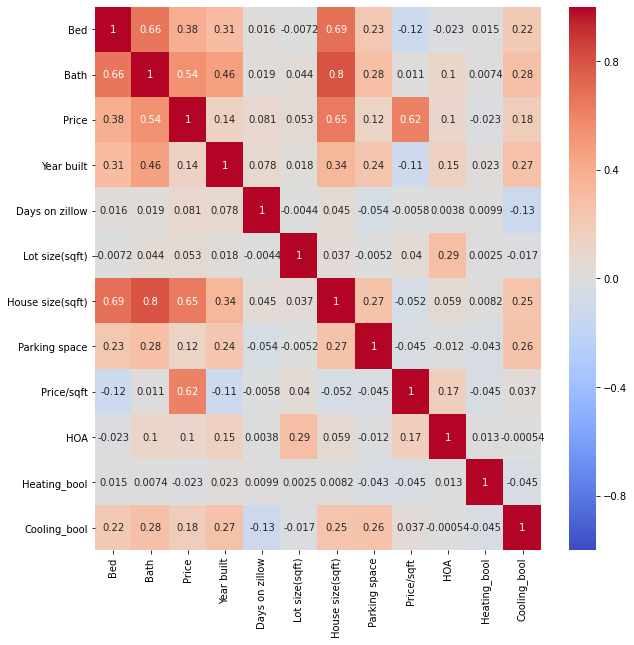

In [28]:
#generate heatmap to find the correlation 
subjective_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(subjective_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

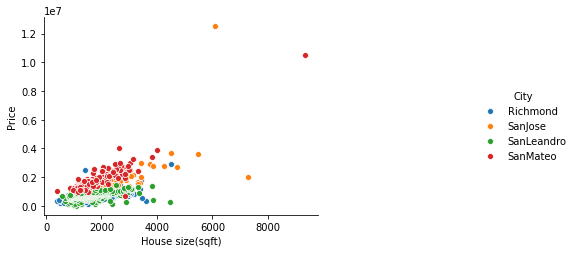

In [29]:
#house price based on house size


data=df[['Price','House size(sqft)','City']]
g = sns.PairGrid(data,x_vars='House size(sqft)', y_vars='Price',hue="City")
g.map(sns.scatterplot)
g.add_legend()
g.fig.set_size_inches(10,4)

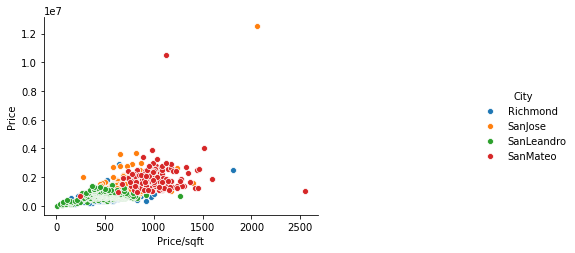

In [30]:
#House Prices based on price/sqft

datapsqft=df[['Price','Price/sqft','City']]

g = sns.PairGrid(datapsqft,x_vars='Price/sqft', y_vars='Price',hue="City")
g.map(sns.scatterplot)
g.add_legend()
g.fig.set_size_inches(10,4)

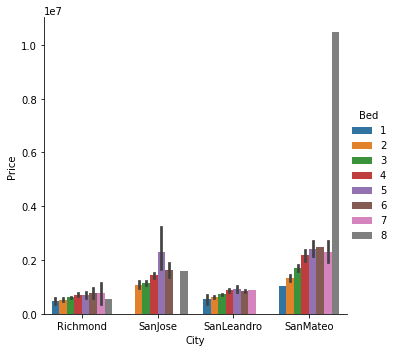

In [31]:
#house prices based on no.of bed rooms
#plt.figure(figsize=(20,10))
sns.catplot(x="City", y="Price", hue="Bed", kind="bar", data=df)

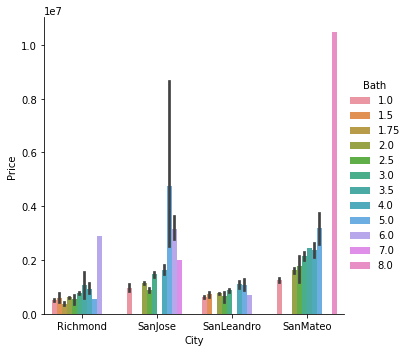

In [32]:
#house prices based on bath
sns.catplot(x="City", y="Price", hue="Bath", kind="bar", data=df)

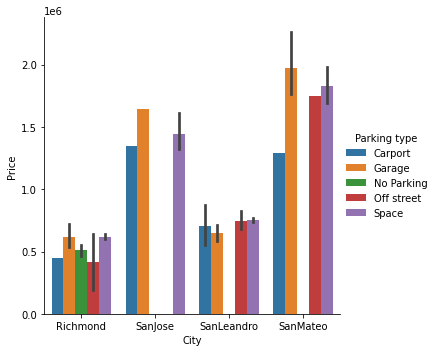

In [33]:
#House prices based on Parking type
sns.catplot(x="City", y="Price", hue="Parking type", kind="bar", data=df)

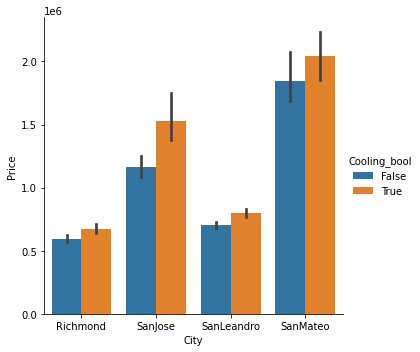

In [34]:
#Housing price based on cooling facility
sns.catplot(x="City", y="Price", hue="Cooling_bool", kind="bar", data=df)

## Kriti Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import MarkerCluster
import numpy as np
import scipy.stats
from scipy.stats.mstats import winsorize
df=pd.read_csv("dataset_finalv11.csv")
df2=pd.read_csv("dataset_finalv3.csv") # data set conatin latitude and longitude 
m = folium.Map(location=df2[["Latitude", "Longitude"]].mean().to_list(), zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)


# For generating corelation coffecient 

columns_to_consider=[4,5,6,8,9,10,12,13,15]
col_list=np.array(df2.columns)
#print(col_list)
#print(df.dtypes)

corr_matrix=pd.DataFrame(columns=col_list[columns_to_consider],index=col_list[columns_to_consider])
city_list=["SanJose","Richmond","SanLeandro","SanMateo"]

pd.set_option
for city in city_list:
    filtered_df=df2[df2['City']==city]
    for i in columns_to_consider:
        for j in columns_to_consider:
            correlation_coeff=np.corrcoef(filtered_df.iloc[:,i],filtered_df.iloc[:,j])
            corr_matrix.loc[col_list[i],col_list[j]]=correlation_coeff[0,1]
    print(city)
    print(corr_matrix)
    
#removing outliers

winsorize(df['Price'],limits=[.05,.05],axis=0,inplace=True)    

Richmond=df.loc[df.City=='Richmond']
SanJose=df.loc[df.City=='SanJose']
SanLeandro=df.loc[df.City=='SanLeandro']
SanMateo=df.loc[df.City=='SanMateo']
Sold_data=df.loc[(df.Status=='Sold')]
Sale_data=df.loc[(df.Status=='Sale')]


SanJose
                        Bed      Bath     Price Days on zillow Lot size(sqft)  \
Bed                       1  0.672008  0.306672      0.0777002        0.17274   
Bath               0.672008         1  0.495654       0.159061       0.274364   
Price              0.306672  0.495654         1       0.524616       0.370405   
Days on zillow    0.0777002  0.159061  0.524616              1       0.146401   
Lot size(sqft)      0.17274  0.274364  0.370405       0.146401              1   
House size(sqft)    0.66883  0.838846  0.653193       0.252162       0.433054   
Parking space      0.148261  0.203292  0.234729       0.121449        0.18819   
Price/sqft        -0.327552 -0.169666  0.518077       0.286251       0.135708   
HOA                 0.11759  0.287608    0.3833       0.237115      0.0263542   

                 House size(sqft) Parking space Price/sqft        HOA  
Bed                       0.66883      0.148261  -0.327552    0.11759  
Bath                     0.838846    

In [ ]:
# creating interactive map 

for i,r in df2.iterrows():
    location = (r["Latitude"], r["Longitude"])
    folium.Marker(location=location,
                      popup = r['Address'],
                      tooltip=r['Address'])\
    .add_to(marker_cluster)

m.save("folium_map.html") # map will be generated 


In [ ]:
df['Status']=pd.Series(df['Status'], dtype="category")
df['Bed']=pd.Series(df['Bed'], dtype="int64")
df['Year built']=pd.Series(df['Year built'], dtype="category")
df['Parking type']=pd.Series(df['Parking type'], dtype="category")
df['Parking space']=pd.Series(df['Parking space'], dtype="category")
df['HOA']=pd.Series(df['HOA'], dtype="int64")
df['City']=pd.Series(df['City'], dtype="category")
df['Days on zillow']=pd.Series(df['Days on zillow'], dtype="int64")
df['Sold date']=pd.Series(df['Sold date'], dtype="datetime64")
df['Heating_bool']=pd.Series(df['Heating_bool'], dtype="bool")
df['Cooling_bool']=pd.Series(df['Cooling_bool'], dtype="bool")

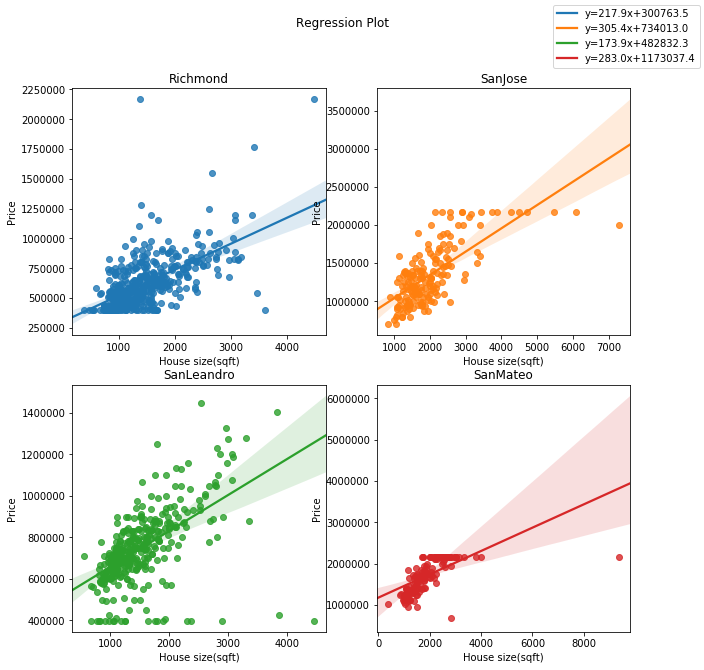

In [ ]:
# Linear Regression Model

model1 = LinearRegression().fit(Richmond['House size(sqft)'].values.reshape(-1,1),Richmond['Price'])
model2 = LinearRegression().fit(SanJose['House size(sqft)'].values.reshape(-1,1),SanJose['Price'])
model3= LinearRegression().fit(SanLeandro['House size(sqft)'].values.reshape(-1,1),SanLeandro['Price'])
model4= LinearRegression().fit(SanMateo['House size(sqft)'].values.reshape(-1,1),SanMateo['Price'])
r_sq1 = model1.score(Richmond['House size(sqft)'].values.reshape(-1,1),Richmond['Price'])
r_sq2 = model2.score(SanJose['House size(sqft)'].values.reshape(-1,1),SanJose['Price'])
r_sq3 = model3.score(SanLeandro['House size(sqft)'].values.reshape(-1,1),SanLeandro['Price'])
r_sq4 = model4.score(SanMateo['House size(sqft)'].values.reshape(-1,1),SanMateo['Price'])
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.regplot('House size(sqft)','Price',data=Richmond,ax=axes[0,0],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(model1.coef_[0],model1.intercept_,r_sq1)})
sns.regplot('House size(sqft)','Price',data=SanJose,ax=axes[0,1],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(model2.coef_[0],model2.intercept_)})
sns.regplot('House size(sqft)','Price',data=SanLeandro,ax=axes[1,0],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(model3.coef_[0],model3.intercept_)})
sns.regplot('House size(sqft)','Price',data=SanMateo,ax=axes[1,1],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(model4.coef_[0],model4.intercept_)})
axes[0,0].set_title('Richmond')
axes[0,1].set_title('SanJose')
axes[1,0].set_title('SanLeandro')
axes[1,1].set_title('SanMateo')


f.suptitle("Regression Plot")
f.legend()
plt.show()


In [ ]:
model1 = LinearRegression().fit(Richmond['House size(sqft)'].values.reshape(-1,1),Richmond['Price'])
r_sq1 = model1.score(Richmond['House size(sqft)'].values.reshape(-1,1),Richmond['Price'])
print("The regression equation for Richmond is y={:.2f}x+ {:.2f} and Coefficient Of Determination is = {:.2f}".format(model1.coef_[0],model1.intercept_,r_sq1))

model2 = LinearRegression().fit(SanJose['House size(sqft)'].values.reshape(-1,1),SanJose['Price'])
r_sq1 = model2.score(SanJose['House size(sqft)'].values.reshape(-1,1),SanJose['Price'])
print("The regression equation for SanJose is y={:.2f}x+ {:.2f} and Coefficient Of Determination is = {:.2f}".format(model1.coef_[0],model1.intercept_,r_sq1))
model3 = LinearRegression().fit(SanLeandro['House size(sqft)'].values.reshape(-1,1),SanLeandro['Price'])
r_sq1 = model3.score(SanLeandro['House size(sqft)'].values.reshape(-1,1),SanLeandro['Price'])
print("The regression equation for SanLeandro is y={:.2f}x+ {:.2f} and Coefficient Of Determination is = {:.2f}".format(model1.coef_[0],model1.intercept_,r_sq1))
model4 = LinearRegression().fit(SanMateo['House size(sqft)'].values.reshape(-1,1),SanMateo['Price'])
r_sq1 = model4.score(SanMateo['House size(sqft)'].values.reshape(-1,1),SanMateo['Price'])
print("The regression equation for SanMateo is y={:.2f}x+ {:.2f} and Coefficient Of Determination is = {:.2f}".format(model1.coef_[0],model1.intercept_,r_sq1))

The regression equation for Richmond is y=217.90x+ 300763.51 and Coefficient Of Determination is = 0.37
The regression equation for SanJose is y=217.90x+ 300763.51 and Coefficient Of Determination is = 0.50
The regression equation for SanLeandro is y=217.90x+ 300763.51 and Coefficient Of Determination is = 0.32
The regression equation for SanMateo is y=217.90x+ 300763.51 and Coefficient Of Determination is = 0.40


In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
#heatmap
subjective_corr = df.corr()
#subjective_corr[np.abs(subjective_corr)<.2] = 0
plt.figure(figsize=(10,10))
sns.heatmap(subjective_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

## Glee Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats.mstats import winsorize

In [ ]:
#Reading CSV file
df = pd.read_csv('dataset_finalv2.csv')
#Replacing the outliers with the 0.05% and 0.95% using winsorize.
df['Price'] = winsorize(df['Price'], limits=[0.05, 0.05])

Here the dataframe is getting split into 4 other subdataframes:
1. Sold with in last 30 days
2. Sold over the 30 days
3. Sale listed in last 30 days
4. Sale listed over the 30 days


In [ ]:
#Spliting the Sale and Sold Status
saleDF=df[df['Status']=='Sale']
soldDF=df[df['Status']=='Sold']
#Splitting the Sale DF to over 30 and under 30 days
sale30DF = saleDF[saleDF['Days on zillow'] <= 30]
saleOver30DF = saleDF[saleDF['Days on zillow']>30]
#Setting up Sold DF
sold30DF = df[(df['Sold date'] >= '2020-08-15') & (df['Sold date'] <= '2020-09-15')]
soldOver30DF = df[(df['Sold date'] >= '2020-01-01') & (df['Sold date'] <= '2020-08-14')]

In [ ]:
#Converting columns into correct datatypes:
df['Url'] = pd.Series(df['Url'], dtype = 'string')
df['Address'] = pd.Series(df['Address'], dtype = 'string')
df['Status'] = pd.Series(df['Status'], dtype = 'category')
df['Bed'] = pd.Series(df['Bed'], dtype = 'int64')
df['Year built'] = pd.Series(df['Year built'], dtype = 'category')
df['Parking type'] = pd.Series(df['Parking type'], dtype = 'category')
df['Parking space'] = pd.Series(df['Parking space'], dtype = 'category')
df['HOA'] = pd.Series(df['HOA'], dtype = 'int64')
df['City'] = pd.Series(df['City'], dtype = 'category')
df['Days on zillow'] = pd.Series(df['Days on zillow'], dtype = 'int64')
df['Sold date'] = pd.Series(df['Sold date'], dtype = 'datetime64')
df['Heating_bool'] = pd.Series(df['Heating_bool'], dtype = 'bool')
df['Cooling_bool'] = pd.Series(df['Cooling_bool'], dtype = 'bool')

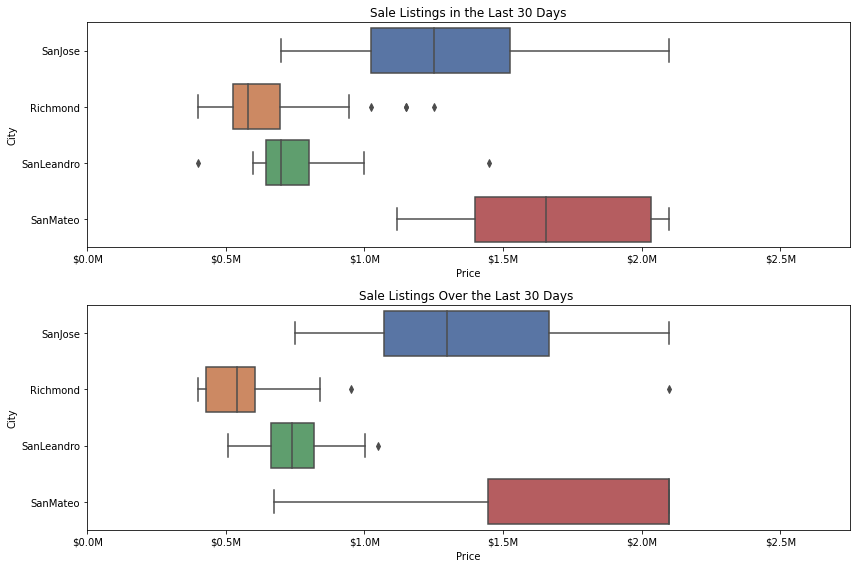

In [ ]:
#SALES
fig, axes = plt.subplots(2,1,figsize=(12,8))
x_ticks = np.arange(0, 2750000, 250000)
axes[0].set_xlim(0, 2750000,250000)
axes[0].set_xticklabels(x_ticks)
axes[1].set_xlim(0, 2750000,250000)
axes[1].set_xticklabels(x_ticks)
def millions(x, pos):
    return '$'+'%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

axes[0].xaxis.set_major_formatter(formatter)
sns.boxplot(ax = axes[0],data = sale30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[0].title.set_text('Sale Listings in the Last 30 Days')


axes[1].xaxis.set_major_formatter(formatter)
sns.boxplot(ax = axes[1],data = saleOver30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[1].title.set_text('Sale Listings Over the Last 30 Days ')
fig.tight_layout()
fig.savefig(r'C:\Users\truon\Desktop\ZillowCharts\SaleBoxPlot.png',dpi=400)

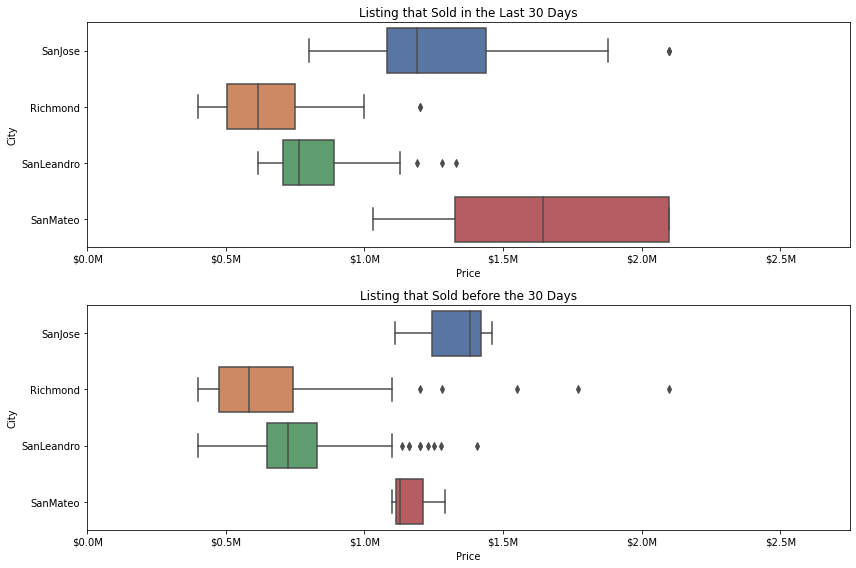

In [ ]:
#SOLD
fig, axes = plt.subplots(2,1,figsize=(12,8))
x_ticks = np.arange(0, 2750000, 250000)
axes[0].set_xlim(0, 2750000,250000)
axes[0].set_xticklabels(x_ticks)
axes[1].set_xlim(0, 2750000,250000)
axes[1].set_xticklabels(x_ticks)
def millions(x, pos):
    return '$'+'%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

axes[0].xaxis.set_major_formatter(formatter)
sns.boxplot(ax = axes[0], data = sold30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[0].title.set_text('Listing that Sold in the Last 30 Days')


axes[1].xaxis.set_major_formatter(formatter)
sns.boxplot(ax = axes[1],data = soldOver30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[1].title.set_text('Listing that Sold before the 30 Days')
fig.tight_layout()
fig.savefig(r'C:\Users\truon\Desktop\ZillowCharts\SoldBoxPlot.png',dpi=400)

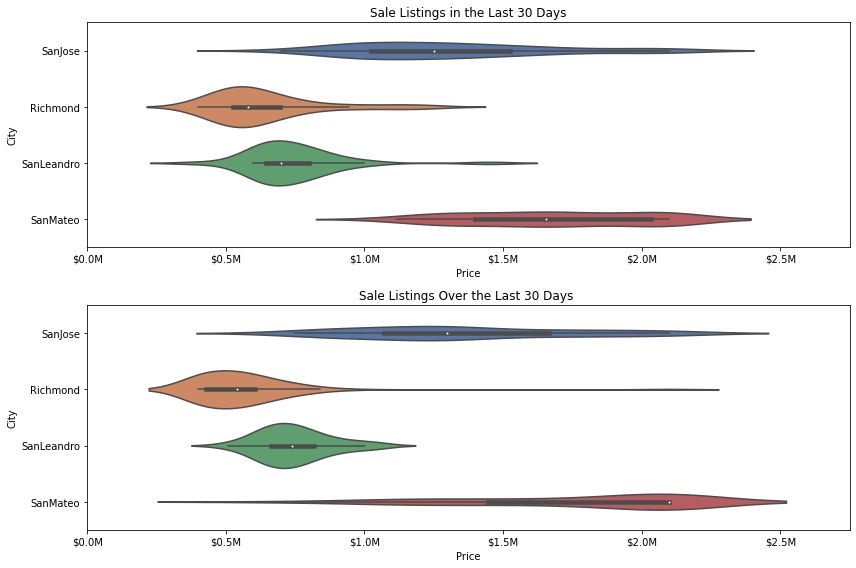

In [ ]:
#SALES VIOLIN
fig, axes = plt.subplots(2,1,figsize=(12,8))
x_ticks = np.arange(0, 2750000, 250000)
axes[0].set_xlim(0, 2750000,250000)
axes[0].set_xticklabels(x_ticks)
axes[1].set_xlim(0, 2750000,250000)
axes[1].set_xticklabels(x_ticks)
def millions(x, pos):
    return '$'+'%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

axes[0].xaxis.set_major_formatter(formatter)
sns.violinplot(ax = axes[0],data = sale30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[0].title.set_text('Sale Listings in the Last 30 Days')


axes[1].xaxis.set_major_formatter(formatter)
sns.violinplot(ax = axes[1],data = saleOver30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[1].title.set_text('Sale Listings Over the Last 30 Days ')
fig.tight_layout()
fig.savefig(r'C:\Users\truon\Desktop\ZillowCharts\SaleViolinPlot.png',dpi=400)

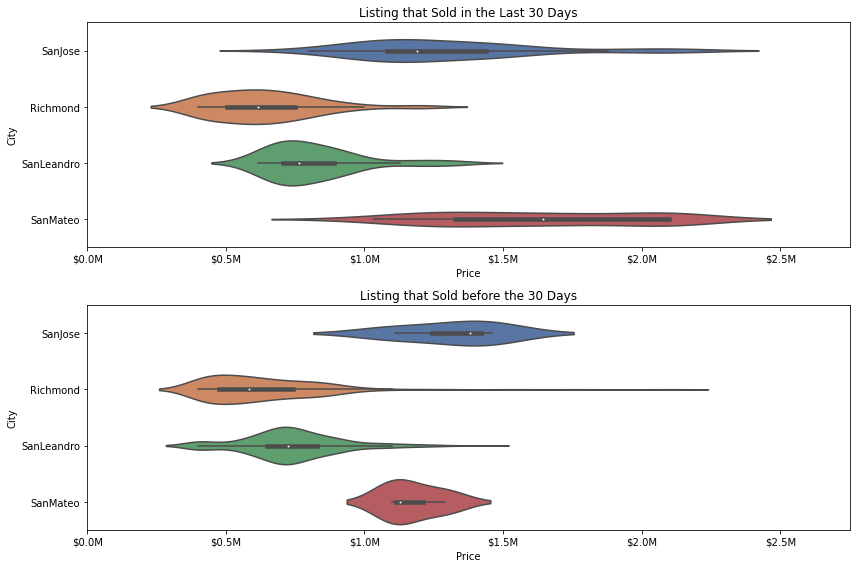

In [ ]:
#SOLDViolin
fig, axes = plt.subplots(2,1,figsize=(12,8))
x_ticks = np.arange(0, 2750000, 250000)
axes[0].set_xlim(0, 2750000,250000)
axes[0].set_xticklabels(x_ticks)
axes[1].set_xlim(0, 2750000,250000)
axes[1].set_xticklabels(x_ticks)
def millions(x, pos):
    return '$'+'%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

axes[0].xaxis.set_major_formatter(formatter)
sns.violinplot(ax = axes[0],data = sold30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[0].title.set_text('Listing that Sold in the Last 30 Days')


axes[1].xaxis.set_major_formatter(formatter)
sns.violinplot(ax = axes[1],data = soldOver30DF, y='City', x ='Price', orient = 'h', palette="deep")
axes[1].title.set_text('Listing that Sold before the 30 Days')
fig.tight_layout()
fig.savefig(r'C:\Users\truon\Desktop\ZillowCharts\SoldViolinPlot.png',dpi=400)

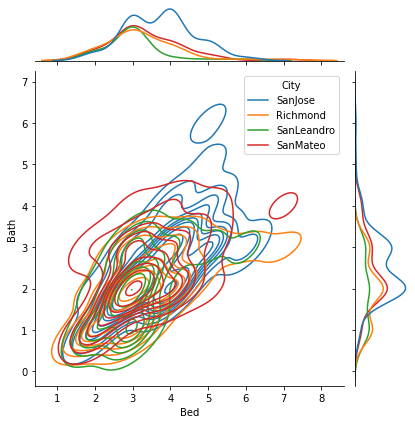

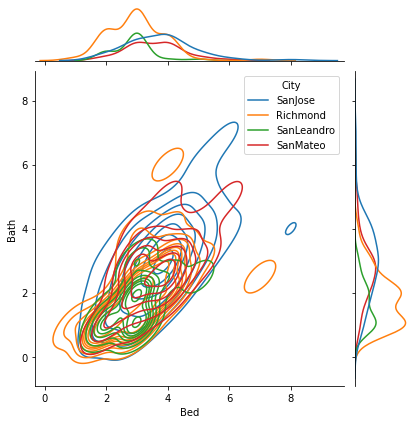

In [ ]:
#Density of bath and bed in the city location.
sns.jointplot( data= sale30DF, x= 'Bed' , y= 'Bath', hue="City", kind="kde")
sns.jointplot( data= saleOver30DF, x= 'Bed' , y= 'Bath', hue="City", kind="kde")